In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/unemployment-and-mental-illness-survey/Cleaned Data.xlsx
/kaggle/input/unemployment-and-mental-illness-survey/data_all_190402/READ_ME.txt
/kaggle/input/unemployment-and-mental-illness-survey/data_all_190402/Excel/CollectorList.xlsx
/kaggle/input/unemployment-and-mental-illness-survey/data_all_190402/Excel/Mental Illness Survey 1.xlsx
/kaggle/input/unemployment-and-mental-illness-survey/data_all_190402/CSV/CollectorList.csv
/kaggle/input/unemployment-and-mental-illness-survey/data_all_190402/CSV/Mental Illness Survey 1.csv
/kaggle/input/unemployment-and-mental-illness-survey/Data_All_190402/READ_ME.txt
/kaggle/input/unemployment-and-mental-illness-survey/Data_All_190402/Excel/CollectorList.xlsx
/kaggle/input/unemployment-and-mental-illness-survey/Data_All_190402/Excel/Mental Illness Survey 1.xlsx
/kaggle/input/unemployment-and-mental-illness-survey/Data_All_190402/CSV/CollectorList.csv
/kaggle/input/unemployment-and-mental-illness-survey/Data_All_190402/CSV/Mental Illness 

In [2]:
df=pd.read_excel('../input/unemployment-and-mental-illness-survey/Cleaned Data.xlsx')

In [3]:
df.head()

,I am currently employed at least part-time,I identify as having a mental illness,Education,I have my own computer separate from a smart phone,I have been hospitalized before for my mental illness,How many days were you hospitalized for your mental illness,I am legally disabled,I have my regular access to the internet,I live with my parents,I have a gap in my resume,...,Obsessive thinking,Mood swings,Panic attacks,Compulsive behavior,Tiredness,Age,Gender,Household Income,Region,Device Type
0,0,0,High School or GED,0,0,0.0,0,1,0,1,...,1.0,0.0,1.0,0.0,0.0,30-44,Male,"$25,000-$49,999",Mountain,Android Phone / Tablet
1,1,1,Some Phd,1,0,0.0,0,1,0,0,...,0.0,0.0,1.0,0.0,1.0,18-29,Male,"$50,000-$74,999",East South Central,MacOS Desktop / Laptop
2,1,0,Completed Undergraduate,1,0,0.0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,30-44,Male,"$150,000-$174,999",Pacific,MacOS Desktop / Laptop
3,0,0,Some Undergraduate,1,0,NaN,0,1,1,1,...,0.0,0.0,0.0,0.0,0.0,30-44,Male,"$25,000-$49,999",New England,Windows Desktop / Laptop
4,1,1,Completed Undergraduate,1,1,35.0,1,1,0,1,...,1.0,1.0,1.0,1.0,1.0,30-44,Male,"$25,000-$49,999",East North Central,iOS Phone / Tablet


In [4]:
df.shape

(334, 31)

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
cor=df.corr()

In [7]:
cor

,I am currently employed at least part-time,I identify as having a mental illness,I have my own computer separate from a smart phone,I have been hospitalized before for my mental illness,How many days were you hospitalized for your mental illness,I am legally disabled,I have my regular access to the internet,I live with my parents,I have a gap in my resume,Total length of any gaps in my resume in months.,...,I am on section 8 housing,How many times were you hospitalized for your mental illness,Lack of concentration,Anxiety,Depression,Obsessive thinking,Mood swings,Panic attacks,Compulsive behavior,Tiredness
I am currently employed at least part-time,1.000000,-0.065718,0.126657,-0.159753,-0.134509,-0.310250,0.143274,-0.166550,-0.145068,-0.241202,...,-0.123518,-0.042900,-0.046651,-0.125585,-0.094638,-0.106622,-0.117100,-0.168008,-0.038354,-0.040233
I identify as having a mental illness,-0.065718,1.000000,-0.125679,0.439156,0.291421,0.237348,-0.080127,0.137187,0.250350,0.219437,...,0.015836,0.126772,0.370499,0.567467,0.712368,0.426044,0.443726,0.445889,0.403595,0.281464
I have my own computer separate from a smart phone,0.126657,-0.125679,1.000000,-0.125730,-0.151312,-0.116516,0.217900,-0.125075,-0.182295,-0.167198,...,-0.007550,-0.016522,-0.039372,-0.205544,-0.107092,-0.128130,-0.176590,-0.097535,-0.075143,-0.007644
I have been hospitalized before for my mental illness,-0.159753,0.439156,-0.125730,1.000000,0.540973,0.315741,-0.063998,0.075473,0.223729,0.182043,...,0.113515,0.359856,0.155959,0.249252,0.340045,0.361444,0.247587,0.321463,0.267385,0.151201
How many days were you hospitalized for your mental illness,-0.134509,0.291421,-0.151312,0.540973,1.000000,0.246325,-0.044202,0.145937,0.179582,0.112779,...,0.049401,0.662266,-0.026030,0.182759,0.229210,0.213138,0.147707,0.271200,0.183054,0.001428
I am legally disabled,-0.310250,0.237348,-0.116516,0.315741,0.246325,1.000000,0.010008,0.138883,0.137505,0.196681,...,0.091647,0.073773,0.172561,0.112163,0.241015,0.183042,0.171397,0.152192,0.152252,0.097591
I have my regular access to the internet,0.143274,-0.080127,0.217900,-0.063998,-0.044202,0.010008,1.000000,-0.034376,-0.039393,-0.094103,...,0.028245,-0.037055,-0.007255,-0.049428,0.003305,-0.023610,-0.133309,0.034829,0.002574,0.056366
I live with my parents,-0.166550,0.137187,-0.125075,0.075473,0.145937,0.138883,-0.034376,1.000000,0.175459,0.044540,...,0.014954,0.116312,0.114977,0.165007,0.163039,0.153506,0.233749,0.122880,0.195804,-0.002316
I have a gap in my resume,-0.145068,0.250350,-0.182295,0.223729,0.179582,0.137505,-0.039393,0.175459,1.000000,0.648278,...,0.013668,0.065282,0.163383,0.204279,0.252746,0.244760,0.167549,0.293844,0.243720,0.096946
Total length of any gaps in my resume in months.,-0.241202,0.219437,-0.167198,0.182043,0.112779,0.196681,-0.094103,0.044540,0.648278,1.000000,...,0.140936,0.031048,0.161942,0.210823,0.169188,0.144542,0.148231,0.250986,0.266728,0.095734


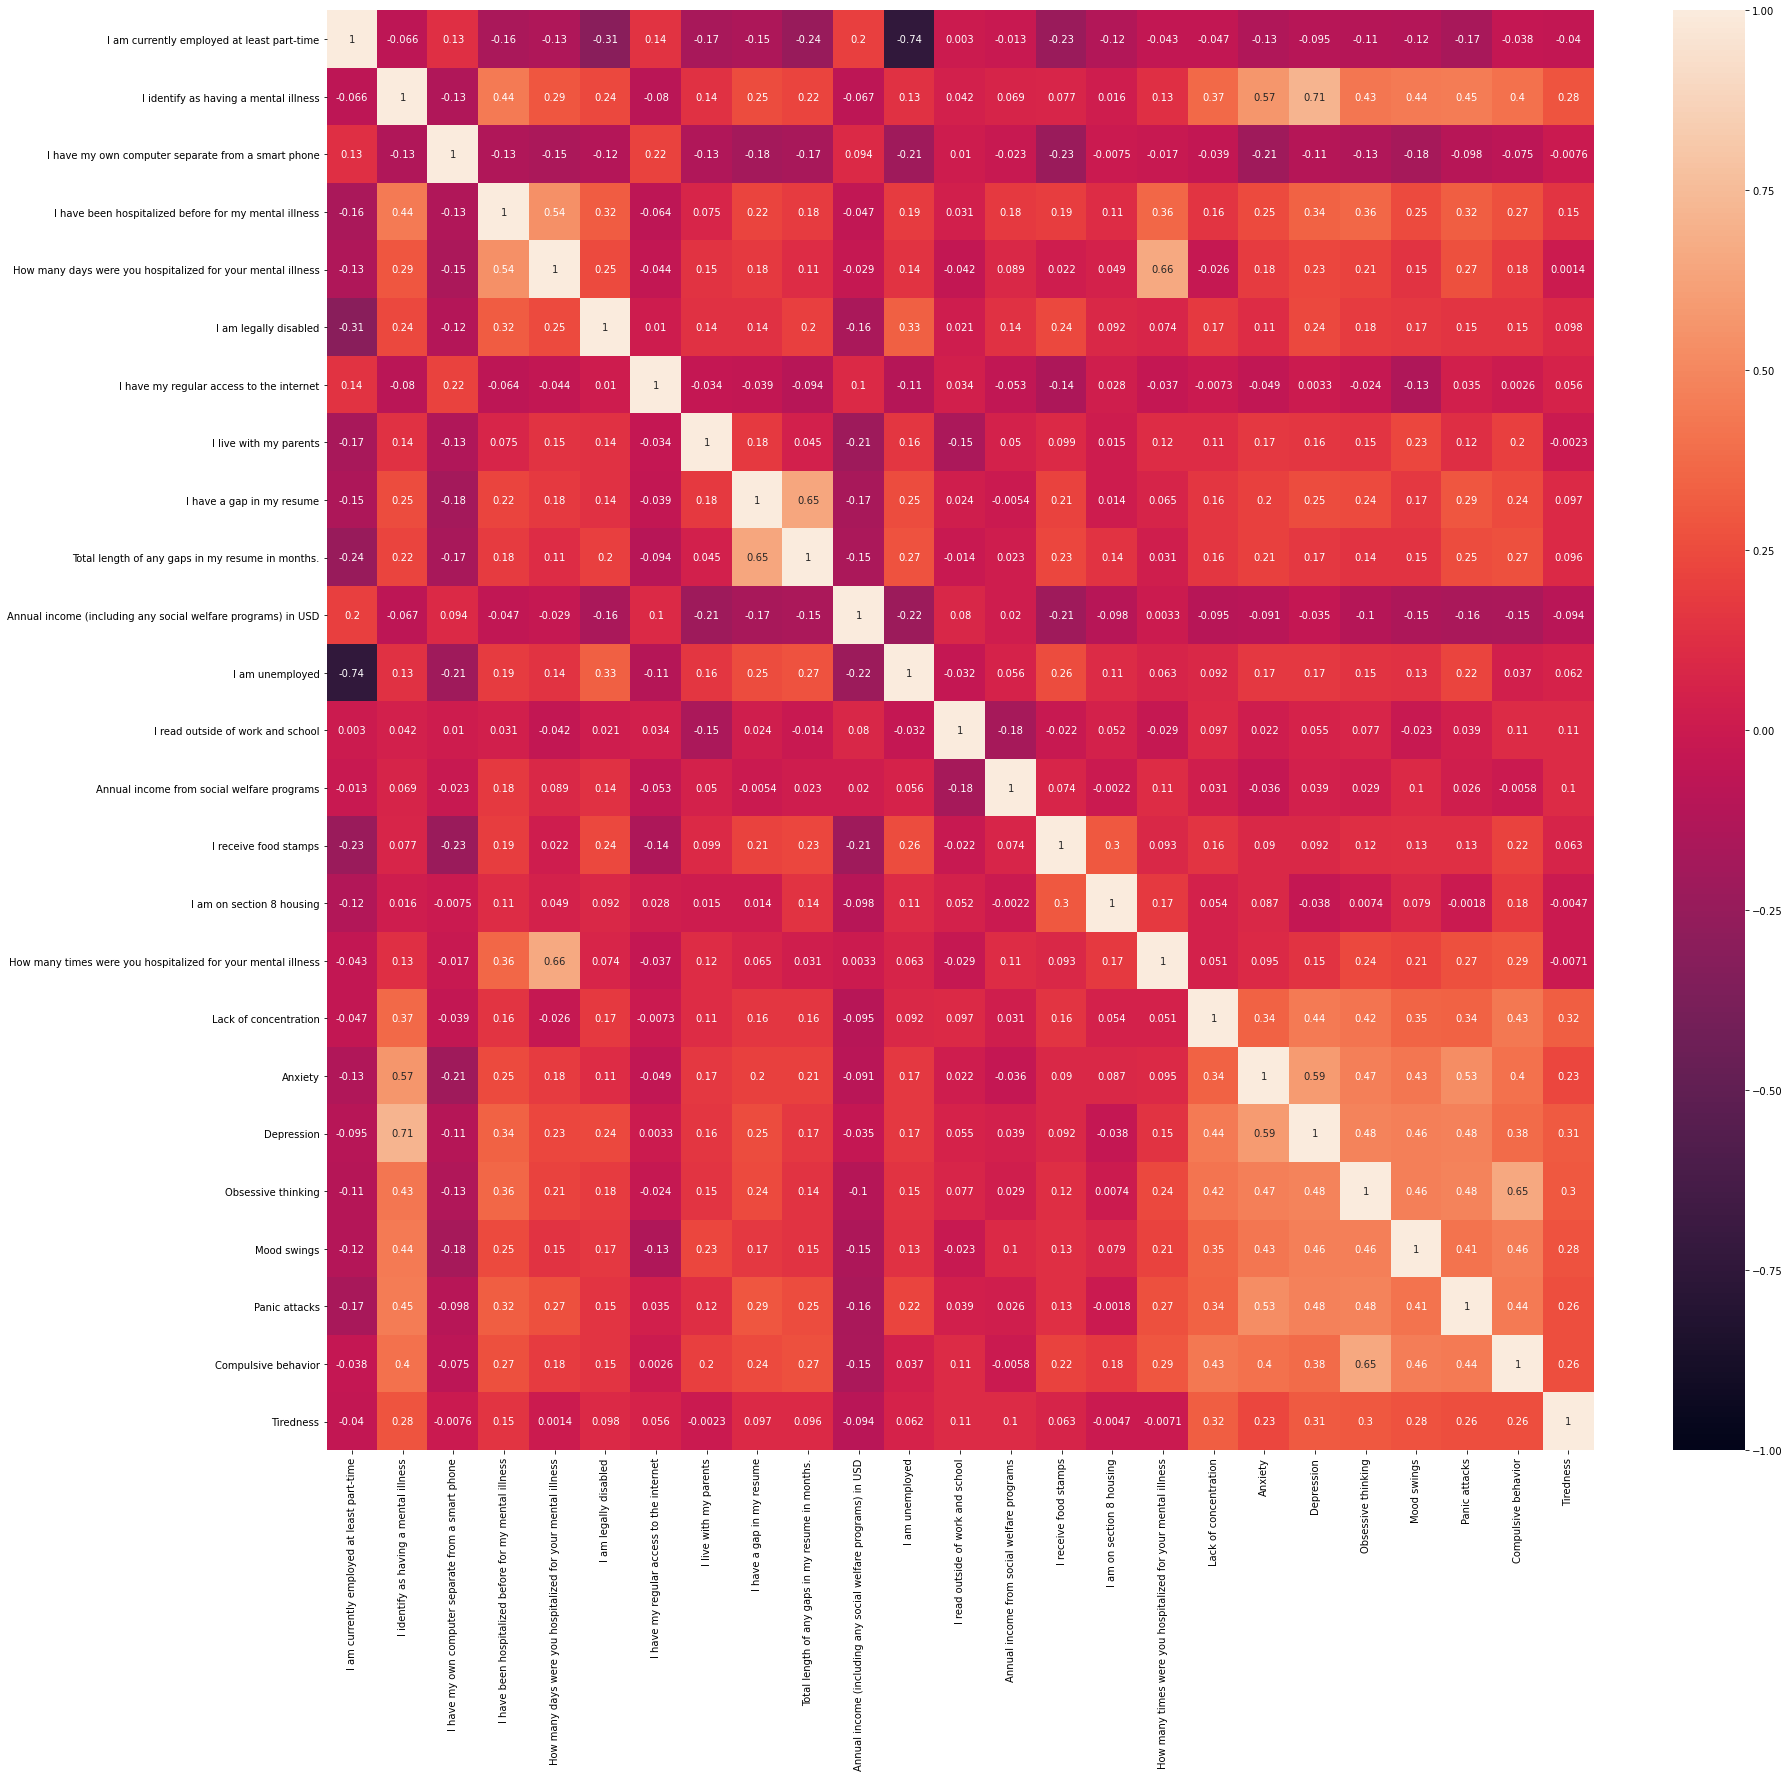

In [8]:
fig = plt.figure(figsize=(22,20))

fig.add_axes([0,0,1,1])
ax = fig.get_axes()[0]
sns.heatmap(cor, ax=ax, vmin=-1, vmax=1, annot=True)

In [9]:
cor.iloc[1]

I am currently employed at least part-time                     -0.065718
I identify as having a mental illness                           1.000000
I have my own computer separate from a smart phone             -0.125679
I have been hospitalized before for my mental illness           0.439156
How many days were you hospitalized for your mental illness     0.291421
I am legally disabled                                           0.237348
I have my regular access to the internet                       -0.080127
I live with my parents                                          0.137187
I have a gap in my resume                                       0.250350
Total length of any gaps in my resume in months.                0.219437
Annual income (including any social welfare programs) in USD   -0.066703
I am unemployed                                                 0.134788
I read outside of work and school                               0.041625
Annual income from social welfare programs         

In [10]:
columns_to_drop=['Region','I have my regular access to the internet','I am currently employed at least part-time','I am on section 8 housing','I receive food stamps','Annual income from social welfare programs','I have a gap in my resume','Total length of any gaps in my resume in\xa0months.','Household Income','Device Type']


In [11]:
df.drop(columns=columns_to_drop,inplace=True)

In [12]:
df.shape

(334, 21)

In [13]:
df['Annual income (including any social welfare programs) in Rupee']=df['Annual income (including any social welfare programs) in USD']*70

In [14]:
df.drop('Annual income (including any social welfare programs) in USD',axis=1,inplace=True)

In [15]:
df.head(20)

,I identify as having a mental illness,Education,I have my own computer separate from a smart phone,I have been hospitalized before for my mental illness,How many days were you hospitalized for your mental illness,I am legally disabled,I live with my parents,I am unemployed,I read outside of work and school,How many times were you hospitalized for your mental illness,...,Anxiety,Depression,Obsessive thinking,Mood swings,Panic attacks,Compulsive behavior,Tiredness,Age,Gender,Annual income (including any social welfare programs) in Rupee
0,0,High School or GED,0,0,0.0,0,0,1,1,0,...,1,1,1.0,0.0,1.0,0.0,0.0,30-44,Male,2450
1,1,Some Phd,1,0,0.0,0,0,0,1,0,...,1,1,0.0,0.0,1.0,0.0,1.0,18-29,Male,1540
2,0,Completed Undergraduate,1,0,0.0,0,0,0,1,0,...,0,0,0.0,0.0,0.0,0.0,0.0,30-44,Male,7000
3,0,Some Undergraduate,1,0,NaN,0,1,1,1,0,...,0,0,0.0,0.0,0.0,0.0,0.0,30-44,Male,0
4,1,Completed Undergraduate,1,1,35.0,1,0,0,1,4,...,1,1,1.0,1.0,1.0,1.0,1.0,30-44,Male,2240
5,0,High School or GED,1,0,0.0,0,1,0,1,0,...,0,0,0.0,0.0,0.0,0.0,0.0,30-44,Male,0
6,0,Some Undergraduate,1,0,0.0,0,0,0,1,0,...,0,0,0.0,0.0,0.0,0.0,0.0,18-29,Male,70
7,1,Some Undergraduate,1,0,0.0,0,1,0,1,0,...,1,1,0.0,0.0,1.0,1.0,1.0,18-29,Male,770
8,0,Completed Undergraduate,1,0,0.0,0,0,0,1,0,...,1,1,0.0,0.0,0.0,0.0,1.0,30-44,Male,5110
9,1,Some Masters,1,0,0.0,0,0,0,1,0,...,1,1,0.0,0.0,0.0,0.0,1.0,30-44,Male,840


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 21 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   I identify as having a mental illness                           334 non-null    int64  
 1   Education                                                       334 non-null    object 
 2   I have my own computer separate from a smart phone              334 non-null    int64  
 3   I have been hospitalized before for my mental illness           334 non-null    int64  
 4   How many days were you hospitalized for your mental illness     297 non-null    float64
 5   I am legally disabled                                           334 non-null    int64  
 6   I live with my parents                                          334 non-null    int64  
 7   I am unemployed                                      

In [17]:
for i in df:
    if i=='Education' or i=='Age' or i=='Gender':
        df[i].dropna()
    else:
        df[i].fillna(df[i].median(),inplace=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 21 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   I identify as having a mental illness                           334 non-null    int64  
 1   Education                                                       334 non-null    object 
 2   I have my own computer separate from a smart phone              334 non-null    int64  
 3   I have been hospitalized before for my mental illness           334 non-null    int64  
 4   How many days were you hospitalized for your mental illness     334 non-null    float64
 5   I am legally disabled                                           334 non-null    int64  
 6   I live with my parents                                          334 non-null    int64  
 7   I am unemployed                                      

In [19]:
y=df['I identify as having a mental illness']

In [20]:
df.drop('I identify as having a mental illness',axis=1,inplace=True)

In [21]:
df.head()

,Education,I have my own computer separate from a smart phone,I have been hospitalized before for my mental illness,How many days were you hospitalized for your mental illness,I am legally disabled,I live with my parents,I am unemployed,I read outside of work and school,How many times were you hospitalized for your mental illness,Lack of concentration,Anxiety,Depression,Obsessive thinking,Mood swings,Panic attacks,Compulsive behavior,Tiredness,Age,Gender,Annual income (including any social welfare programs) in Rupee
0,High School or GED,0,0,0.0,0,0,1,1,0,1.0,1,1,1.0,0.0,1.0,0.0,0.0,30-44,Male,2450
1,Some Phd,1,0,0.0,0,0,0,1,0,1.0,1,1,0.0,0.0,1.0,0.0,1.0,18-29,Male,1540
2,Completed Undergraduate,1,0,0.0,0,0,0,1,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,30-44,Male,7000
3,Some Undergraduate,1,0,0.0,0,1,1,1,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,30-44,Male,0
4,Completed Undergraduate,1,1,35.0,1,0,0,1,4,1.0,1,1,1.0,1.0,1.0,1.0,1.0,30-44,Male,2240


## Label encoding

In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
le_educatio=LabelEncoder()
le_age=LabelEncoder()
le_gender=LabelEncoder()

In [24]:
df['Education']=le_educatio.fit_transform(df['Education'])

In [25]:
df['Age']=le_age.fit_transform(df['Age'])
df['Gender']=le_gender.fit_transform(df['Gender'])

In [26]:
df.head()

,Education,I have my own computer separate from a smart phone,I have been hospitalized before for my mental illness,How many days were you hospitalized for your mental illness,I am legally disabled,I live with my parents,I am unemployed,I read outside of work and school,How many times were you hospitalized for your mental illness,Lack of concentration,Anxiety,Depression,Obsessive thinking,Mood swings,Panic attacks,Compulsive behavior,Tiredness,Age,Gender,Annual income (including any social welfare programs) in Rupee
0,3,0,0,0.0,0,0,1,1,0,1.0,1,1,1.0,0.0,1.0,0.0,0.0,1,1,2450
1,4,1,0,0.0,0,0,0,1,0,1.0,1,1,0.0,0.0,1.0,0.0,1.0,0,1,1540
2,2,1,0,0.0,0,0,0,1,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,1,1,7000
3,5,1,0,0.0,0,1,1,1,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,1,1,0
4,2,1,1,35.0,1,0,0,1,4,1.0,1,1,1.0,1.0,1.0,1.0,1.0,1,1,2240


## standardizing data

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
ss=StandardScaler()

In [29]:
df2=ss.fit_transform(df)

In [30]:
df2.shape

(334, 20)

In [31]:
X=df.values

In [32]:
X.shape

(334, 20)

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
print(X_train.shape,y_train.shape)

(267, 20) (267,)


## Training the Logistic regression model

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
lr=LogisticRegression()

In [38]:
lr.fit(X_train,y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [39]:
y_pred=lr.predict(X_test)

In [40]:
y_pred

array([0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0])

In [41]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score,accuracy_score

In [42]:
accuracy_score(y_test,y_pred)

0.8208955223880597

In [43]:
cf_matrix=confusion_matrix(y_test,y_pred)

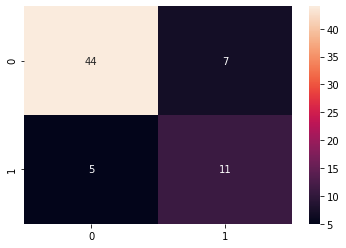

In [44]:
sns.heatmap(cf_matrix, annot=True)

In [45]:
recall_score(y_test,y_pred)

0.6875

In [46]:
precision_score(y_test,y_pred)

0.6111111111111112

# In this model we have accuracy of 86.56% on test data and recall score of 0.875 and precision rate of 0.66.
# we will prefer going for more recall value as we want less False Negative

In [47]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
rf=RandomForestClassifier()

In [49]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [50]:
y_pred2=rf.predict(X_test)

In [51]:
accuracy_score(y_test,y_pred2)

0.8955223880597015

In [52]:
recall_score(y_test,y_pred2)

1.0

In [53]:
precision_score(y_test,y_pred2)

0.6956521739130435

In [54]:
cf_matrix2=confusion_matrix(y_test,y_pred2)

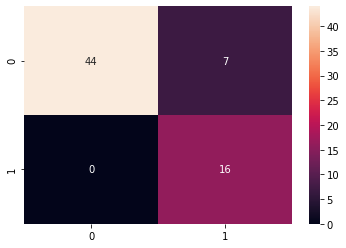

In [55]:
sns.heatmap(cf_matrix2, annot=True)

In [56]:
import pickle

In [57]:
filename = 'Standart_scale.sav'
pickle.dump(ss, open(filename, 'wb'))

In [58]:
filename1='education_labelencoder.sav'
filename2='age_labelencoder.sav'
filename3='gender_labelencoder.sav'

In [59]:
pickle.dump(le_educatio, open(filename1, 'wb'))

pickle.dump(le_age, open(filename2, 'wb'))

pickle.dump(le_gender, open(filename3, 'wb'))

In [ ]:
filename = 'model.sav'
pickle.dump(rf, open(filename, 'wb'))